In [10]:
# load data
import pandas as pd
import numpy as np

data = pd.read_csv("kmean_data.csv")
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [11]:
# define X and y

X = data.drop(["labels"], axis=1)
y = data.loc[:, "labels"]

In [12]:
# 一共多少个种类
pd.value_counts(y)

/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_89752/232014922.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


labels
2    1156
1     954
0     890
Name: count, dtype: int64

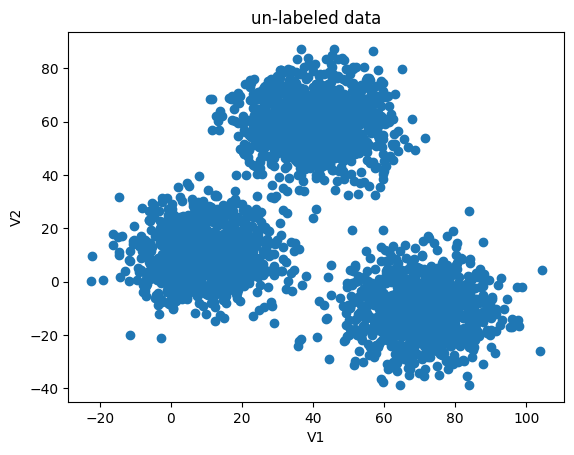

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure()
plt.scatter(X.loc[:, "V1"], X.loc[:, "V2"])
plt.title("un-labeled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

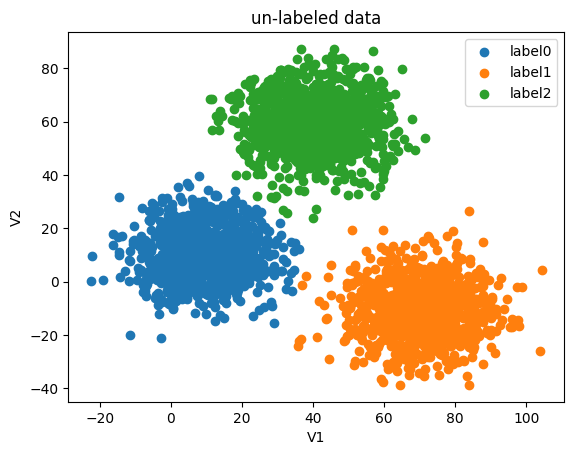

In [14]:
fig2 = plt.figure()
label0 = plt.scatter(X.loc[:, "V1"][y==0], X.loc[:, "V2"][y==0])
label1 = plt.scatter(X.loc[:, "V1"][y==1], X.loc[:, "V2"][y==1])
label2 = plt.scatter(X.loc[:, "V1"][y==2], X.loc[:, "V2"][y==2])
plt.title("un-labeled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.show()

In [17]:
print(X.shape, y.shape)

from sklearn.cluster import MeanShift, estimate_bandwidth

# obtain the bandwidth
bw = estimate_bandwidth(X, n_samples=500)
print(bw)

ms = MeanShift(bandwidth=bw)
ms.fit(X)


(3000, 2) (3000,)
30.84663454820215


MeanShift(bandwidth=30.84663454820215)

In [19]:
y_pred = ms.predict(X)
print(pd.value_counts(y_pred))

print(pd.value_counts(y))


0    1149
1     952
2     899
Name: count, dtype: int64
labels
2    1156
1     954
0     890
Name: count, dtype: int64


/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_89752/369810865.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_pred))
/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_89752/369810865.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y))


In [20]:
# 重新排列
from sklearn.metrics import accuracy_score

y_corrected = []
for i in y_pred:
    if i == 0:
        y_corrected.append(2)
    if i == 1:
        y_corrected.append(1)
    if i == 2:
        y_corrected.append(0)

print(pd.value_counts(y_corrected))

print(accuracy_score(y, y_corrected))

2    1149
1     952
0     899
Name: count, dtype: int64
0.997


/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_89752/997316524.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_corrected))
/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_89752/997316524.py:13: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print(pd.value_counts(y_corrected))
